# Lab 4: Exercise solutions

In [1]:
with open('../course/common.py') as fin:
    exec(fin.read())

In [2]:
with open('../course/matplotlibconf.py') as fin:
    exec(fin.read())

In [3]:
import seaborn as sns

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict, based on diagnostic measurements, whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last column is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use `pandas` to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what standardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by an ML model. Make sure you define your target variable well. Will you need dummy columns?

In [4]:
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,...,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,...,33.6,0.627,50,1
1,1,85,66,29,...,26.6,0.351,31,0
2,8,183,64,0,...,23.3,0.672,32,1
3,1,89,66,23,...,28.1,0.167,21,0
4,0,137,40,35,...,43.1,2.288,33,1


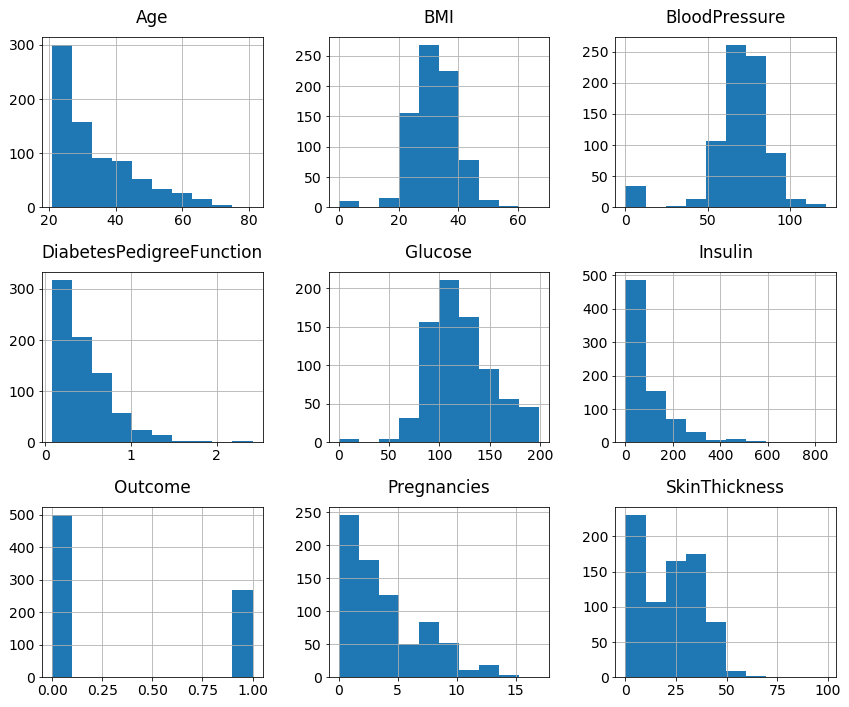

In [5]:
df.hist(figsize=(12, 10))
plt.tight_layout()

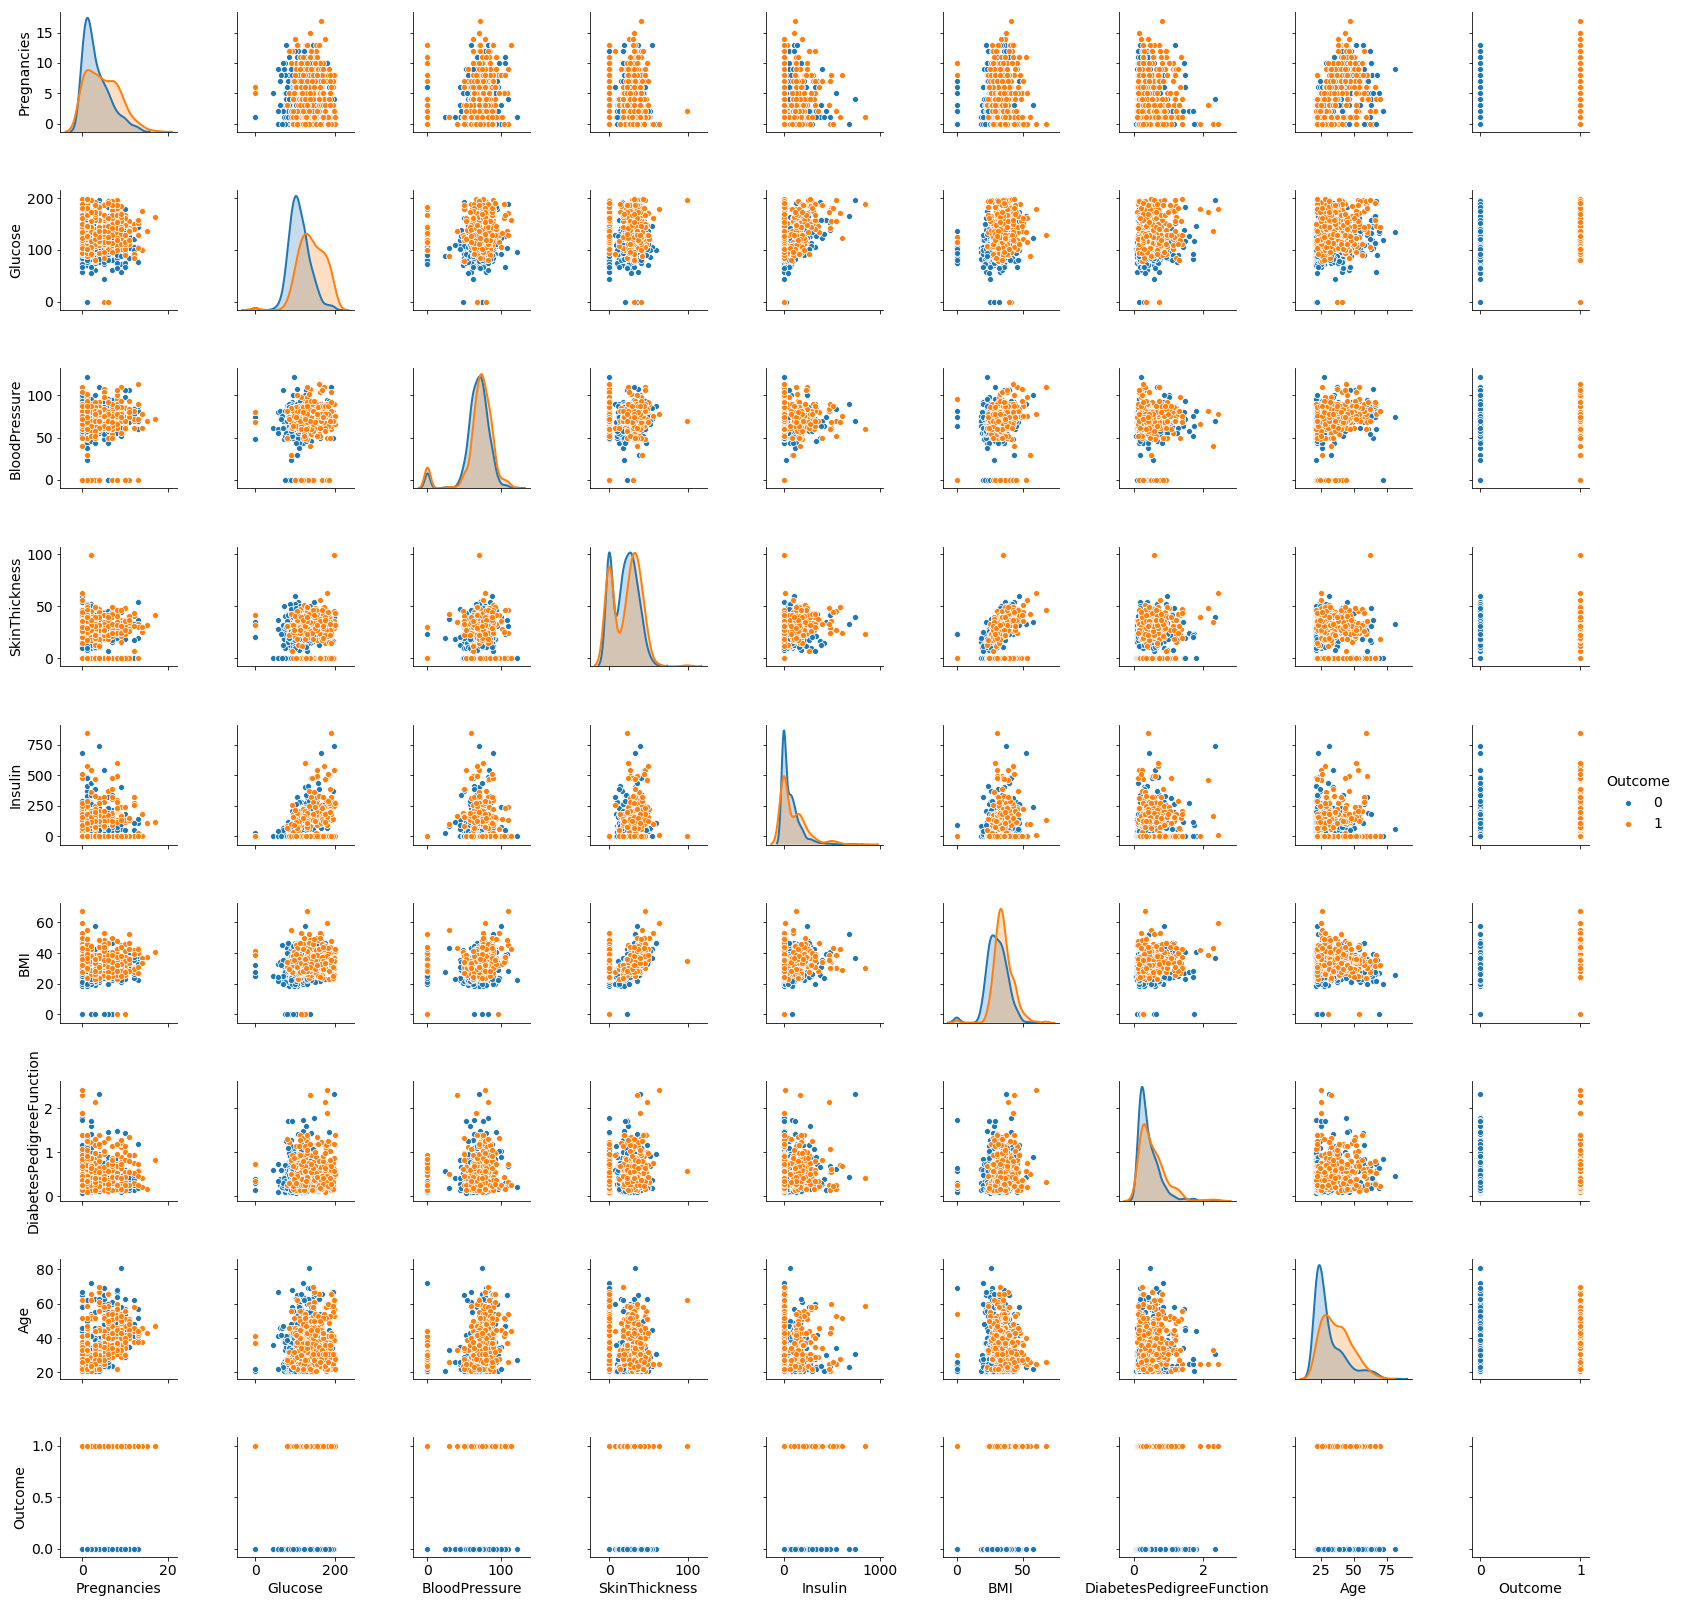

In [6]:
sns.pairplot(df, hue='Outcome');

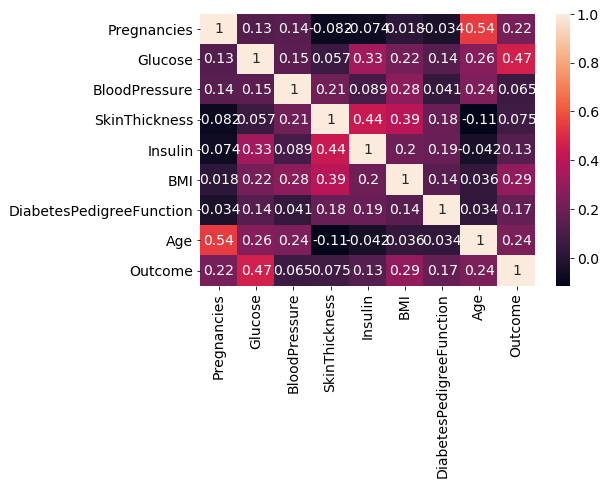

In [7]:
sns.heatmap(df.corr(), annot = True);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,...,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,...,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,...,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,...,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,...,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,...,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,...,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,...,67.100000,2.420000,81.000000,1.000000


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
sc = StandardScaler()
X = sc.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values
y_cat = to_categorical(y)

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at the output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split

In [14]:
X.shape

(768, 8)

In [15]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y_cat,
                     random_state=22, test_size=0.2)

In [16]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=20,
          verbose=0, validation_split=0.1);

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
accuracy_score(y_test_class, y_pred_class)

0.7142857142857143

In [22]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       100
           1       0.71      0.31      0.44        54

   micro avg       0.71      0.71      0.71       154
   macro avg       0.71      0.62      0.62       154
weighted avg       0.71      0.71      0.68       154



In [23]:
confusion_matrix(y_test_class, y_pred_class)

array([[93,  7],
       [37, 17]])

## Exercise 3

Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the same train/test split. Is the performance better or worse?
- Try restricting your features to only four features like in the suggested notebook. How does model performance change?

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
    mod.fit(X_train, y_train[:, 1])
    y_pred = mod.predict(X_test)
    print("="*80)
    print(mod)
    print("-"*80)
    acc_ = accuracy_score(y_test_class, y_pred)
    print("Accuracy score: {:0.3}".format(acc_))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class, y_pred))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
--------------------------------------------------------------------------------
Accuracy score: 0.695
Confusion Matrix:
[[89 11]
 [36 18]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Accuracy score: 0.721
Confusion Matrix:
[[89 11]
 [32 22]]

GaussianNB(priors=None, var_smoothing=1e-09)
-------------